# Introduction - Deep Learning

Classical programming is all about creating a function that helps us to process input data and get the desired output.

In the learning paradigm, we change the process so that given a set of examples of input data and desired output, we aim to learn the function that can process the data.

- In machine learning, we end up handcrafting the features and then learn the function to get the desired output
- In deep learning, we want to both learn the features and the function together to get the desired output

![Learning Paradigm](img/learning_paradigm.png)

# Theory of Deep Learning

We will start with why deep learning works and explain the basis of Universal Approximation

Let us take a non-linear function - a saddle function

$$ Z = 2X^2 - 3Y^2  + 1 + \epsilon $$

## Create a Noisy Function

In [17]:
# Numerical Library
import numpy as np

# Visualisation Library
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
x = np.arange(-10,10,0.1)
y = np.arange(-10,10,0.1)

In [19]:
X, Y = np.meshgrid(x, y)
c = np.ones((200,200))
e = np.random.rand(200,200)

In [20]:
Z = 2*X*X - 3*Y*Y + 5*c + e

In [21]:
# Helper function 
from helpers import plot3d

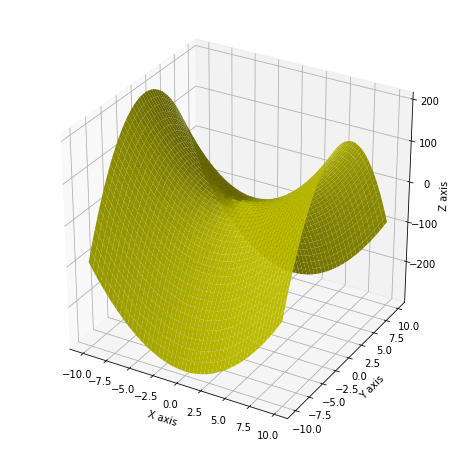

In [22]:
plot3d(X,Y,Z)

## Approximate using Neural Network

In [23]:
import keras

In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
input_xy = np.c_[X.reshape(-1),Y.reshape(-1)]
output_z = Z.reshape(-1)

In [26]:
input_xy

array([[-10. , -10. ],
       [ -9.9, -10. ],
       [ -9.8, -10. ],
       ...,
       [  9.7,   9.9],
       [  9.8,   9.9],
       [  9.9,   9.9]])

In [27]:
output_z.shape, input_xy.shape

((40000,), (40000, 2))

In [28]:
model = Sequential()
model.add(Dense(50, input_dim=2,  activation="relu"))
model.add(Dense(10, input_dim=2,  activation="relu"))
model.add(Dense(1))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='mse', optimizer="adam")

In [31]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='logs/model')

In [16]:
%time
history = model.fit(input_xy, output_z, batch_size=10, epochs=2, verbose=1, callbacks=[tbCallBack])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 13.1 µs


NameError: name 'model' is not defined

In [49]:
Z_pred = model.predict(input_xy).reshape(200,200)

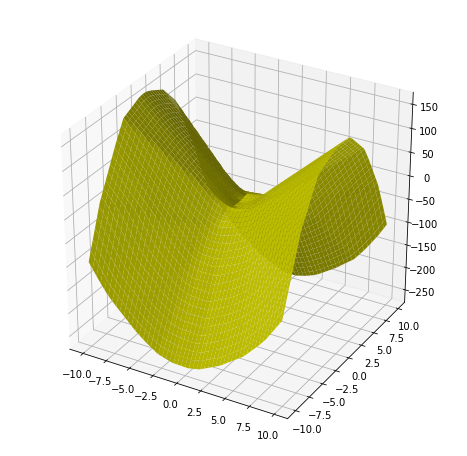

In [50]:
plot3d(X,Y,Z_pred)

Try changing the activation to a "linear" and see whether you can predict the function or not 